# Exploratory Data Analysis (EDA) 2 Tutorial  

---

**Goal:** Learn how to explore a real dataset systematically before modeling:

* Univariate
* Bivariate
* Multivariate

---

### Dataset (your class files from Spectrum)
- `salary_cleaned.csv` — main table (includes Salary and core demographics)
- `xtra_info.csv` — extra columns (job title, state, etc.)

---

## Import Libraries



In [52]:
# Import libraries
import numpy as np
import pandas as pd

## Mount Google Drive into Colab

In [53]:
# Mount Google Drive into Colab. Colab runs on a cloud VM. Your Drive is not available by default. When you run it, Colab will show an authentication link and ask you to authorize.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load CSV Files into DataFrames

In [54]:
# Load CSV files into DataFrames
df_salary_cleaned = pd.read_csv('/content/drive/MyDrive/WIA1007/Dataset/salary_cleaned.csv') #load the csv dataset into a 'dataframe' df
df_xtra_info = pd.read_csv('/content/drive/MyDrive/WIA1007/Dataset/xtra_info.csv') #load the csv dataset into a 'dataframe' df

## Print number of rows in each DataFrame

In [55]:
print ('\nNo of rows in df_salary_cleaned DataFrame:')
# Print number of rows in df_salary_cleaned DataFrame
print(len(df_salary_cleaned))

print ('\nNo of rows in df_xtra_info DataFrame:')
# Print number of rows in df_xtra_info DataFrame
print(len(df_xtra_info))


No of rows in df_salary_cleaned DataFrame:
28012

No of rows in df_xtra_info DataFrame:
13404


## Combine both DataFrames horizontally (add columns)

Then we concatenate side-by-side (**axis=1**) to form `df_master`.

In [56]:
# Combine both DataFrames horizontally (add columns)
df_master = pd.concat([df_salary_cleaned,df_xtra_info],axis=1)

print ('\nAfter combine both DataFrames:')
# Print number of rows in df_master DataFrame
print(len(df_master))


After combine both DataFrames:
28012


## Print rows in df_master DataFrame

In [57]:
# Print top 5 rows in df_master DataFrame
df_master.head()

,USERID,Age,Industry,Job title,Salary,Compensation,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,Race,Salary_USD,Compensation_USD,USERID,CGPA,Salary_month_USD,Special Bonus_GBP
0,0,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000.0,0.0,8683.0,2.990627,4583.333333,2437.0
1,1,25-34,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,United Kingdom,Unknown,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,68250.0,5000.0,3880.0,2.288131,5166.666667,740.0
2,2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,2000.0,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000.0,2000.0,8898.0,3.903324,5000.000000,3806.0
3,3,25-34,Nonprofits,Program Manager,62000.0,3000.0,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,62000.0,3000.0,4441.0,2.470852,9333.333333,4691.0
4,4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,60000.0,7000.0,7537.0,3.559457,3750.000000,4580.0


## Analyzing each column

In [58]:
df_master.columns # Shows the column names
df_master = df_master.drop(columns='USERID')
df_master.columns # Shows the column names again, so you can verify USERID is gone.

Index(['Age', 'Industry', 'Job title', 'Salary', 'Compensation', 'Country',
       'State', 'City', 'Overall years of experience',
       'Years of experience in current job', 'Education level', 'Gender',
       'Race', 'Salary_USD', 'Compensation_USD', 'CGPA', 'Salary_month_USD',
       'Special Bonus_GBP'],
      dtype='object')

## Analyzing each feature

In [ ]:
# This loop prints how many unique values each column has.
for feature in df_master.columns:
  len_feature = df_master[feature].nunique()
  print(f'{feature}: {len_feature}')

Timestamp: 12364
Age: 7
Industry: 717
Job title: 7670
Salary: 1791
Compensation: 451
Currency: 5
Country: 89
State: 106
City: 2664
Overall years of experience: 8
Years of experience in current job: 8
Education level: 6
Gender: 5
CGPA: 13403
Salary_month_USD: 1791
Special Bonus_GBP: 4673


## Create empty small vs large lists (Placeholders)

Why this is useful in EDA:

- Columns with few unique values (e.g., 2–10) are usually categorical → good for bar charts.

- Columns with many unique values are often numeric or high-cardinality categories (like Job Title) → handled differently.

In [61]:
# This code is currently only printing the number of unique values per column. We created two empty lists
feature_small = []
feature_large = []

for feature in df_master.columns:
  x = df_master[feature].nunique()
  print(f'{feature}: {x}')

Age: 7
Industry: 1216
Job title: 14344
Salary: 3342
Compensation: 423
Country: 361
State: 138
City: 4797
Overall years of experience: 8
Years of experience in current job: 8
Education level: 6
Gender: 5
Race: 52
Salary_USD: 4021
Compensation_USD: 594
CGPA: 13403
Salary_month_USD: 1791
Special Bonus_GBP: 4673


## Split into small vs large lists

What probably intended split into small vs large lists.

Common EDA trick:
- Treat columns with ≤ 10 unique values as “small categorical” and
- Others as “large/high-cardinality”.

In [62]:
# This code splits into small and large lists and prints the lists
feature_small = []
feature_large = []

for feature in df_master.columns:
  len_feature = df_master[feature].nunique()
  if (len_feature<=10):
    feature_small.append([feature, len_feature])

  else:
    feature_large.append([feature, len_feature])

print('----Feature small----')
for item in feature_small:
  #print(f'{item}: {item[0]}')
  print(item)

print('\n-----Feature large------')
for item in feature_large:
  print(item)


----Feature small----
['Age', 7]
['Overall years of experience', 8]
['Years of experience in current job', 8]
['Education level', 6]
['Gender', 5]

-----Feature large------
['Industry', 1216]
['Job title', 14344]
['Salary', 3342]
['Compensation', 423]
['Country', 361]
['State', 138]
['City', 4797]
['Race', 52]
['Salary_USD', 4021]
['Compensation_USD', 594]
['CGPA', 13403]
['Salary_month_USD', 1791]
['Special Bonus_GBP', 4673]


## Analyzing (small) categorical variables.

* It is easier to analyze small categorical variables first.
* Which category comprises most of the data?
* What impact does a category have on the dataset?

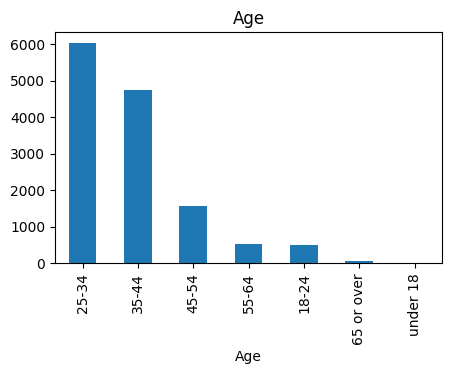

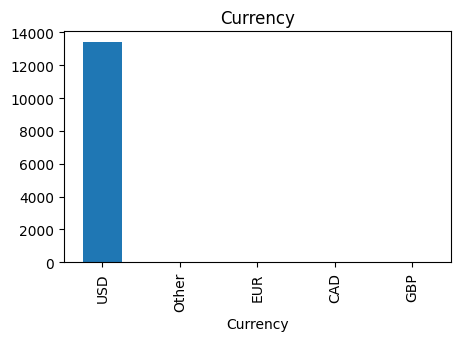

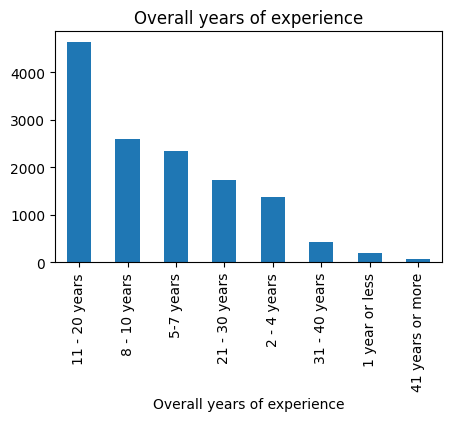

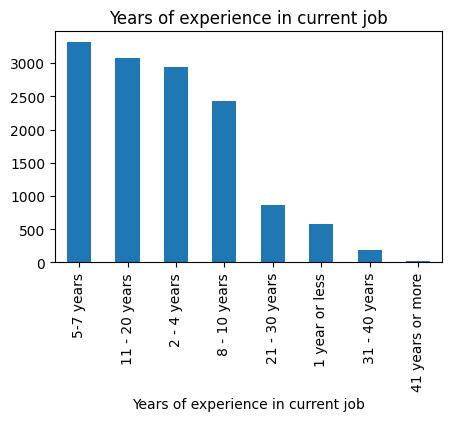

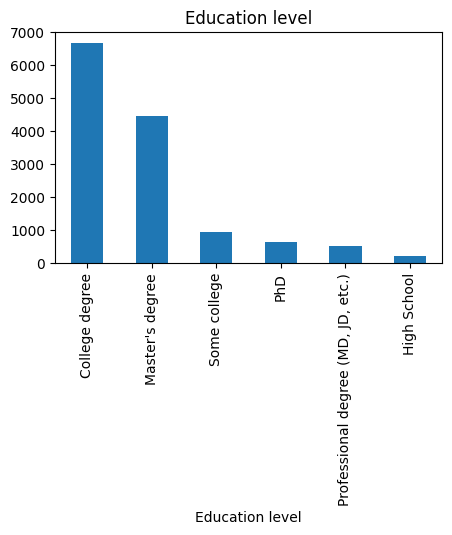

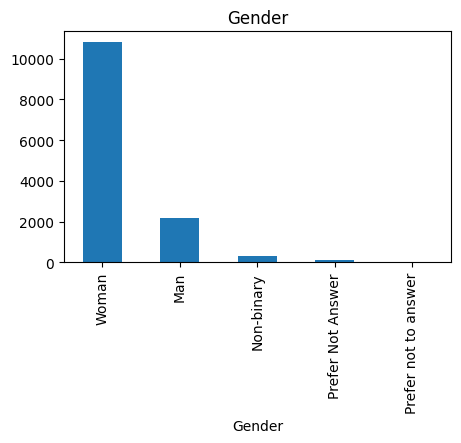

In [ ]:
import matplotlib.pyplot as plt
for item in feature_small:
  column_name = item[0]
  #print(column_name)

  df_master[column_name].value_counts().plot(kind='bar',figsize=(5,3),title=column_name)
  plt.show()

## Using subplots to improve visualization

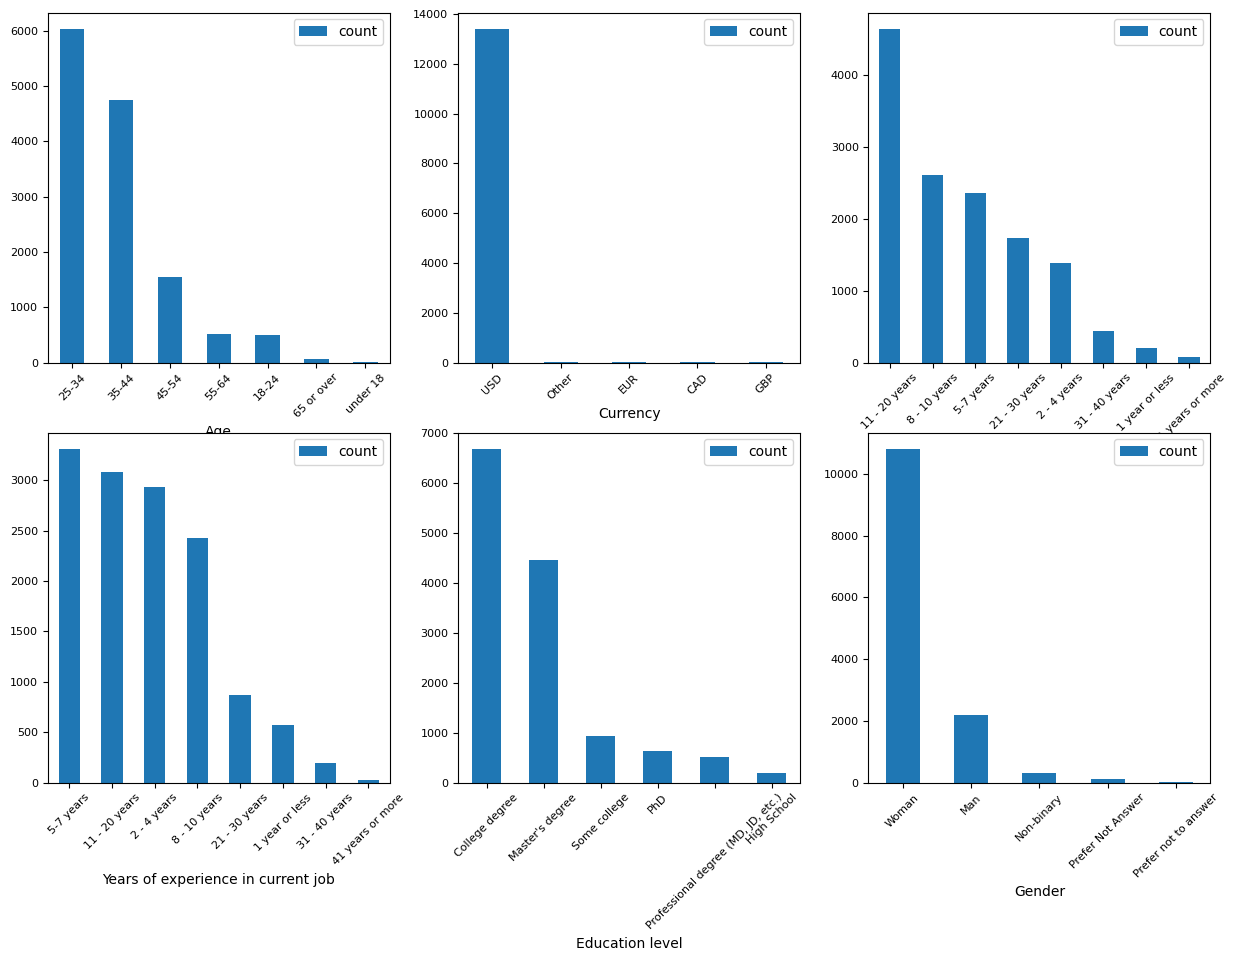

In [ ]:
fig, axes = plt.subplots(2, 3)

import matplotlib.pyplot as plt
i=0
j=0
for item in feature_small:
  column_name = item[0]
  #df_master[column_name].value_counts().plot(kind='bar',figsize=(16,12),title=column_name,ax=axes[i,j],fontsize=8,rot=45,legend=column_name)
  df_master[column_name].value_counts().plot(kind='bar',figsize=(15,10),ax=axes[i,j],fontsize=8,rot=45,legend=column_name)

  #axes[i,j].title.set_size(10)

  if(j<2):
    j+=1
  else:
    j=0
    i+=1


## Analyzing the effect of gender on salary distribution.
* Compare distribution of salary by different gender
* What is the conclusion here?

In [ ]:
# Slicing, subset, filtering the data
# Method 1

x = df_master[df_master['Gender']=="Man"]
y = x[x['Education level']=='College degree']
y

,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,CGPA,Salary_month_USD,Special Bonus_GBP
6,4/27/2021 11:03:09,35-44,"Accounting, Banking & Finance",Manager of Information Services,100000.0,0.0,USD,United States,Michigan,Detroit,11 - 20 years,11 - 20 years,College degree,Man,3.261070,8333.333333,4790.0
19,4/27/2021 11:04:02,25-34,Government and Public Administration,Manager of Data Integrity and Prospect Research,65000.0,0.0,USD,USA,Virginia,Richmond,5-7 years,5-7 years,College degree,Man,2.750741,5416.666667,4059.0
28,4/27/2021 11:04:29,65 or over,Property or Construction,Safety Director,104000.0,25000.0,USD,USA,Georgia,Atlanta,41 years or more,21 - 30 years,College degree,Man,3.063841,8666.666667,186.0
43,4/27/2021 11:05:08,45-54,Computing or Tech,senior web application developer,98166.0,0.0,USD,United States,Indiana,Indianapolis,21 - 30 years,21 - 30 years,College degree,Man,2.305738,8180.500000,2595.0
77,4/27/2021 11:06:07,25-34,Engineering or Manufacturing,Production Technician,65000.0,4000.0,USD,United States,Wisconsin,Madison,5-7 years,2 - 4 years,College degree,Man,3.079249,5416.666667,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13394,5/9/2023 17:57,45-54,Computing or Tech,Junior Data Analyst,65000.0,0.0,USD,USA,Virginia,Richmond,21 - 30 years,1 year or less,College degree,Man,3.850488,5416.666667,4945.0
13395,5/28/2023 16:10:53,45-54,Computing or Tech,Data Analyst,65000.0,0.0,USD,United States,New York,Bronx,21 - 30 years,8 - 10 years,College degree,Man,2.597469,5416.666667,135.0
13399,9/25/2023 9:20:50,18-24,"Accounting, Banking & Finance",Program Analyst,70000.0,5000.0,USD,United States,Missouri,St.Louis,1 year or less,1 year or less,College degree,Man,3.852219,5833.333333,2399.0
13400,10/5/2023 12:26,45-54,"Marketing, Advertising & PR",Account Supervisor,100000.0,0.0,USD,USA,Texas,Austin,31 - 40 years,31 - 40 years,College degree,Man,2.679718,8333.333333,3552.0


In [ ]:
# Slicing, subset, filtering the data
# Method 2

#df_master.query('Gender == "Man"')
df_master.query('Gender == "Man" and State == "Michigan"')


,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,CGPA,Salary_month_USD,Special Bonus_GBP
6,4/27/2021 11:03:09,35-44,"Accounting, Banking & Finance",Manager of Information Services,100000.0,0.0,USD,United States,Michigan,Detroit,11 - 20 years,11 - 20 years,College degree,Man,3.261070,8333.333333,4790.0
51,4/27/2021 11:05:23,45-54,Education (Higher Education),Professor,95000.0,10000.0,USD,USA,Michigan,Detroit,21 - 30 years,11 - 20 years,PhD,Man,2.258662,7916.666667,861.0
370,4/27/2021 11:14:31,25-34,Engineering or Manufacturing,Product development engineer,90000.0,5000.0,USD,USA,Michigan,Dearborn,8 - 10 years,5-7 years,College degree,Man,2.216275,7500.000000,3599.0
400,4/27/2021 11:15:23,35-44,Sales,Inside Sales Representative,55000.0,12000.0,USD,USA,Michigan,Auburn Hills,5-7 years,5-7 years,College degree,Man,3.111487,4583.333333,1874.0
739,4/27/2021 11:25:56,35-44,Education (Primary/Secondary),Teacher,54389.0,0.0,USD,United States,Michigan,Portage,11 - 20 years,11 - 20 years,Master's degree,Man,3.705842,4532.416667,2887.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13126,10/26/2021 15:31:32,25-34,Engineering or Manufacturing,Maintenance Team Leader,71240.0,12000.0,USD,USA,Michigan,Sterling Heights,11 - 20 years,11 - 20 years,College degree,Man,3.926296,5936.666667,4012.0
13172,10/27/2021 7:35:42,25-34,Transport or Logistics,Trade Advisory Consultant,70000.0,1000.0,USD,United States,Michigan,Detroit,5-7 years,2 - 4 years,College degree,Man,2.916323,5833.333333,3418.0
13275,2/13/2022 15:22:24,25-34,Engineering or Manufacturing,Test Automation Engineer,125000.0,15000.0,USD,United States,Michigan,Detroit,5-7 years,5-7 years,Master's degree,Man,3.041803,10416.666670,3638.0
13276,2/13/2022 15:24:49,25-34,Engineering or Manufacturing,Test Automation Engineer,125000.0,15000.0,USD,United States,Michigan,Detroit,5-7 years,5-7 years,Master's degree,Man,2.630510,10416.666670,4672.0


<Axes: >

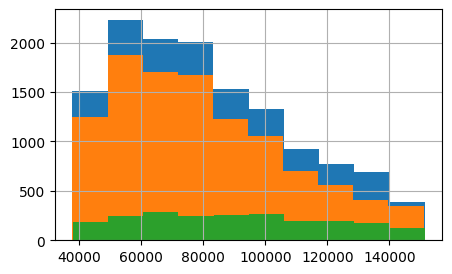

In [ ]:
# In one line, the data is sliced/filter by gender, then the 'compensation' column is selected, then the histogram of the compensation
# column of woman is plotted
#df_master[df_master['Gender']=='Woman']['Compensation'].hist()
#df_master[df_master['Gender']=='Man']['Salary'].hist(figsize=(5,3))

df_master['Salary'].hist(figsize=(5,3))
df_master[df_master['Gender']=='Woman']['Salary'].hist(figsize=(5,3)) #'Slicing' or 'Subsetting' the data by gender
df_master[df_master['Gender']=='Man']['Salary'].hist(figsize=(5,3))

Men are paid more than women

<Axes: >

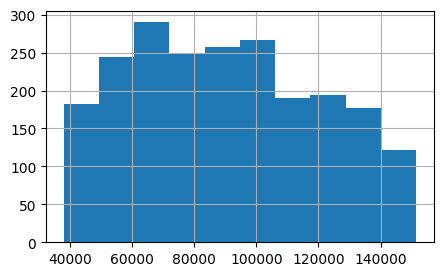

In [ ]:
df_master[df_master['Gender']=='Man']['Salary'].hist(figsize=(5,3))

#df_master['Salary'].plot.box(figsize=(5,3))
#df_master[df_master['Gender']=='Woman']['Salary'].plot.box(figsize=(5,3))
#plt.show()
#df_master[df_master['Gender']=='Man']['Salary'].plot.box(figsize=(5,3))


In [ ]:
df_woman = df_master[df_master['Gender']=='Woman']


numerical_cols = df_master.select_dtypes(include=np.number).columns.tolist()
df_woman[numerical_cols].corr()


,Salary,Compensation,CGPA,Salary_month_USD,Special Bonus_GBP
Salary,1.000000,0.413883,0.011891,1.000000,0.000940
Compensation,0.413883,1.000000,-0.005318,0.413883,-0.000094
CGPA,0.011891,-0.005318,1.000000,0.011891,0.006638
Salary_month_USD,1.000000,0.413883,0.011891,1.000000,0.000940
Special Bonus_GBP,0.000940,-0.000094,0.006638,0.000940,1.000000


In [ ]:
df_man = df_master[df_master['Gender']=='Man']

df_man[numerical_cols].corr()

,Salary,Compensation,CGPA,Salary_month_USD,Special Bonus_GBP
Salary,1.000000,0.353905,-0.001814,1.000000,0.003739
Compensation,0.353905,1.000000,-0.043991,0.353905,-0.012346
CGPA,-0.001814,-0.043991,1.000000,-0.001814,0.006694
Salary_month_USD,1.000000,0.353905,-0.001814,1.000000,0.003739
Special Bonus_GBP,0.003739,-0.012346,0.006694,0.003739,1.000000


* What is the salary in woman of different education/age/Experience background

In [ ]:
df_woman[df_woman['Education level']=="College degree"]

mean_x = df_woman[df_woman['Education level']=="College degree"]['Salary'].mean()
mean_y = df_man[df_man['Education level']=="College degree"]['Salary'].mean()


print('mean salary of woman who has college degree',mean_x)
print('mean salary of man who has college degree',mean_y)



mean salary of woman who has college degree 77155.12859304085
mean salary of man who has college degree 88774.55326460481


In [ ]:
df_woman[df_woman['Education level']=="College degree"]

#level = 'College degree'
level = "Master's degree"

mean_woman = df_woman[df_woman['Education level']==level]['Salary'].mean()
mean_man = df_man[df_man['Education level']==level]['Salary'].mean()


print(f'mean salary of woman who has {level} degree: {mean_woman}')
print(f'mean salary of man who has {level} degree: {mean_man}')


mean salary of woman who has Master's degree degree: 82590.60483014862
mean salary of man who has Master's degree degree: 94308.19389587073


In [ ]:
df_woman['Education level'].unique()

array(["Master's degree", 'College degree', 'PhD', 'Some college',
       'High School', 'Professional degree (MD, JD, etc.)'], dtype=object)

<Axes: xlabel='Education_level'>

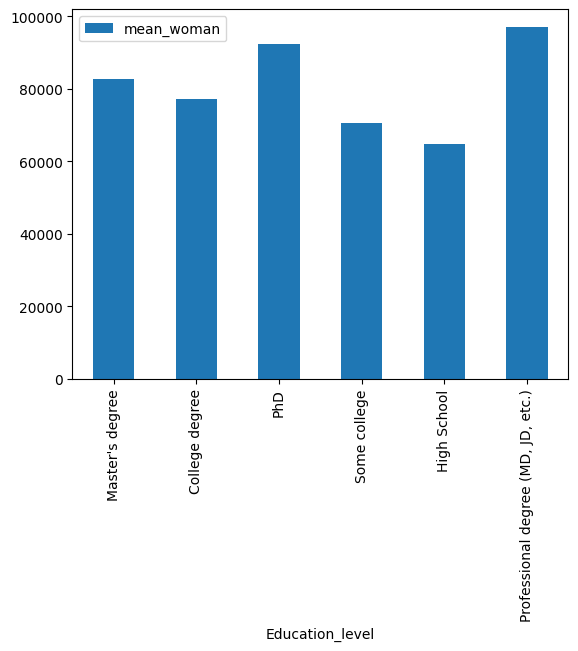

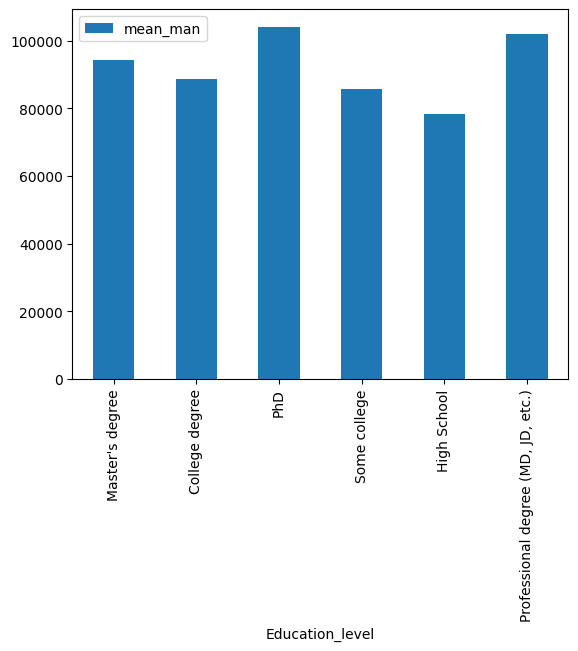

In [ ]:

edu_level_lists = df_woman['Education level'].unique()

salary_by_edu = []
for level in edu_level_lists:

  mean_x = df_woman[df_woman['Education level']==level]['Salary'].mean()
  mean_y = df_man[df_man['Education level']==level]['Salary'].mean()

  salary_by_edu.append([level,mean_x,mean_y])

salary_by_edu = pd.DataFrame(salary_by_edu,columns=['Education_level','mean_woman','mean_man'])
salary_by_edu.head()

salary_by_edu.plot.bar(x='Education_level',y='mean_woman')
salary_by_edu.plot.bar(x='Education_level',y='mean_man')






<Axes: >

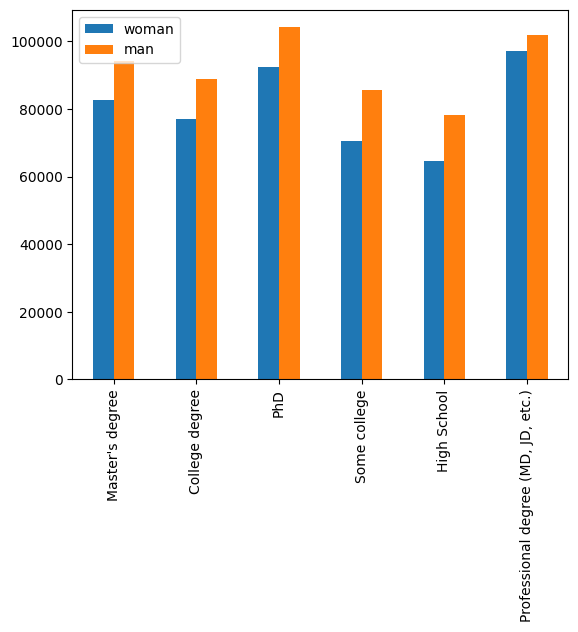

In [ ]:
edu_level_lists = df_woman['Education level'].unique() #can take either man or woman

salary_by_edu = []
woman = []
man = []
for level in edu_level_lists:

  mean_x = df_woman[df_woman['Education level']==level]['Salary'].mean()
  mean_y = df_man[df_man['Education level']==level]['Salary'].mean()

  woman.append(mean_x)
  man.append(mean_y)

salary_by_edu = pd.DataFrame({'woman': woman, 'man':man}, index = edu_level_lists)
#salary_by_edu.head()
salary_by_edu.plot.bar()



<Axes: xlabel='Education level', ylabel='Salary'>

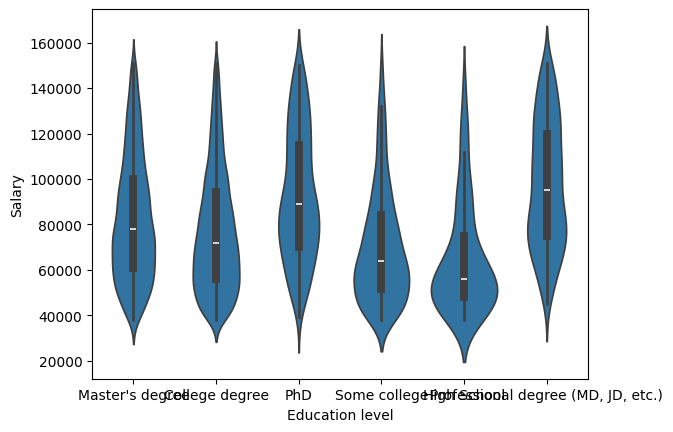

In [ ]:
import seaborn as sns
#sns.violinplot(data=df_master, x='Gender', y='Salary')
x_df = df_master[df_master['Gender']=="Woman"]
sns.violinplot(data=x_df, x='Education level', y='Salary')

In [ ]:
'''
#Data transformation
df_master['Special Bonus_GBP'] = df_master['Special Bonus_GBP'] * 1.22 # currency rate 1GBP=1.22 USD
df_master = df_master .rename(columns={'Special Bonus_GBP': 'Special_Bonus_USD'})

#Data normalization
from sklearn import preprocessing
m=preprocessing.MinMaxScaler(feature_range=(0, 1))

df_master[['Salary','Compensation','Special_Bonus_USD']]=m.fit_transform(df_master[['Salary','Compensation','Special_Bonus_USD']])

'''

"\n#Data transformation\ndf_master['Special Bonus_GBP'] = df_master['Special Bonus_GBP'] * 1.22 # currency rate 1GBP=1.22 USD\ndf_master = df_master .rename(columns={'Special Bonus_GBP': 'Special_Bonus_USD'})\n\n#Data normalization\nfrom sklearn import preprocessing\nm=preprocessing.MinMaxScaler(feature_range=(0, 1))\n\ndf_master[['Salary','Compensation','Special_Bonus_USD']]=m.fit_transform(df_master[['Salary','Compensation','Special_Bonus_USD']])\n\n"

In [ ]:
df_master.columns

Index(['Timestamp', 'Age', 'Industry', 'Job title', 'Salary', 'Compensation',
       'Currency', 'Country', 'State', 'City', 'Overall years of experience',
       'Years of experience in current job', 'Education level', 'Gender',
       'CGPA', 'Salary_month_USD', 'Special Bonus_GBP'],
      dtype='object')

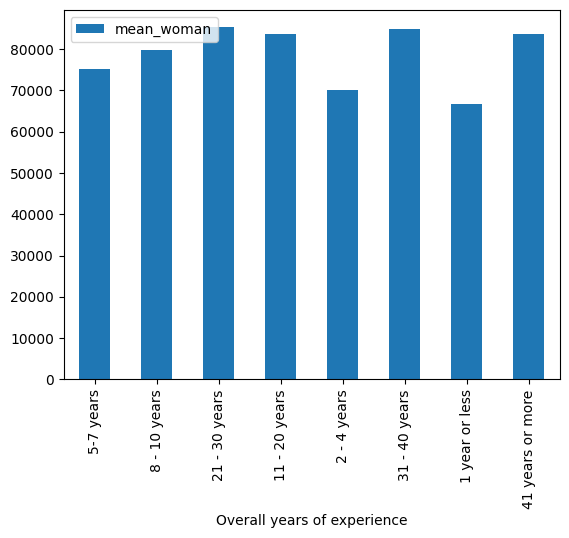

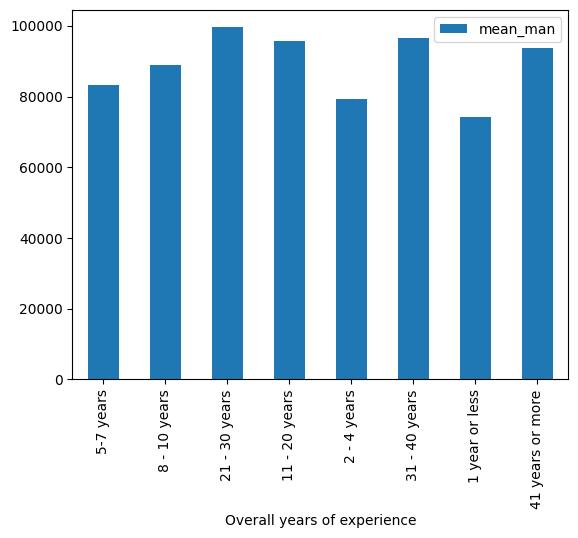

In [ ]:
category = 'Overall years of experience'
def analysis_by_category(category):
  exp_level_lists = df_woman[category].unique()

  salary_by_exp = []
  for level in exp_level_lists:

    mean_x = df_woman[df_woman[category]==level]['Salary'].mean()
    mean_y = df_man[df_man[category]==level]['Salary'].mean()

    salary_by_exp.append([level,mean_x,mean_y])

  salary_by_exp = pd.DataFrame(salary_by_exp,columns=[category,'mean_woman','mean_man'])
  salary_by_exp.head()

  salary_by_exp.plot.bar(x=category,y='mean_woman')
  salary_by_exp.plot.bar(x=category,y='mean_man')

analysis_by_category(category)

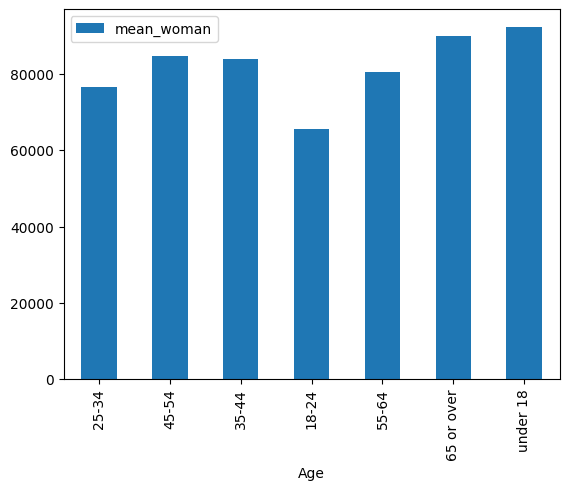

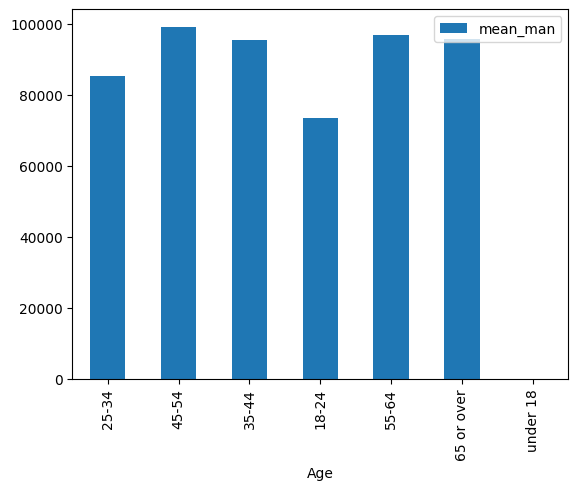

In [ ]:
category = 'Age'

analysis_by_category(category)

In [ ]:
x = df_master[(df_master['Gender']=="Woman")&((df_master['Age']=="under 18"))]

#x['Salary'].hist()
x[x['Salary']>60000]


,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,CGPA,Salary_month_USD,Special Bonus_GBP
5505,4/27/2021 22:10:59,under 18,Nonprofits,Finance Director,118000.0,0.0,USD,United States,District of Columbia,Washington,31 - 40 years,11 - 20 years,Master's degree,Woman,3.402897,9833.333333,744.0
12062,5/6/2021 9:42,under 18,Law,Records manager,106000.0,3200.0,USD,USA,Colorado,Denver,41 years or more,1 year or less,Master's degree,Woman,2.849027,8833.333333,2701.0
12357,5/7/2021 20:45,under 18,Retail,Technology Manager,100200.0,12000.0,USD,USA,Virginia,Richmond,21 - 30 years,21 - 30 years,Some college,Woman,3.617332,8350.000000,4661.0


# Should I do a PhD or get a Prof cert?

* This also depends on gender, industry, or job title

## PhD vs Prof Degree by Job title

In [ ]:
df_master['Job title'].value_counts()

,count
Job title,
Project Manager,126
Software Engineer,101
Teacher,94
Director,89
Executive Assistant,82
...,...
Director of education and family engagement,1
Human Resources & Payroll Manager,1
Managing Attorney,1
